In [1]:
import warnings
warnings.filterwarnings('ignore')

#### 패션 MNIST 데이터 불러오기

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
                            keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # (page, row, column, channel)

train_scaled, val_scaled, train_target, val_target = \
                    train_test_split(
                        train_scaled,
                        train_target,
                        test_size=0.2,
                        random_state=42
                    )


---
#### 합성곱(CNN:Convolution Neural Network) 만들기
- (28, 28, 1) 입력 
- kernel크기 (3,3,1)의  필터 32개를 사용 
- Padding 은 same padding 
- (28, 28, 32)개의 특성 맵 
- (2,2)의 최대풀링 
- (14, 14, 32)의 특성 맵  


In [4]:
model = keras.Sequential()

In [ ]:
# 합성곱 층 
model.add(
    keras.layers.Conv2D(
        32, # Filter 갯수
        kernel_size=3,  # kernel size
        activation='relu',
        padding='same', 
        input_shape=(28, 28, 1)
    )
)

In [6]:
# 최대 풀링 층
model.add(keras.layers.MaxPooling2D(2)) # 2*2 filter

#### 두번째 합성곱층과 완전 연결층
- (14, 14, 32) 입력 
- kernel크기 (3,3,1)의  필터 64개를 사용 
- Padding 은 same padding 
- (14, 14, 64)개의 특성 맵 
- (2,2)의 최대풀링 
- (7, 7, 64)의 특성 맵  

In [7]:
# 합성곱 층 
model.add(
    keras.layers.Conv2D(
        64, # Filter 갯수
        kernel_size=3,  # kernel size
        activation='relu',
        padding='same'
    )
)

In [8]:
# 최대 풀링 층
model.add(keras.layers.MaxPooling2D(2)) # 2*2 filter

In [9]:
28*28

784

In [10]:
7*7*64

3136

#### 심층신경망
- 입력층 : 3136개
- 은닉층 : 100개
- Dropout층 : 0.4
- 출력층 : 10개 

In [11]:
model.add(
    keras.layers.Flatten()
)
model.add(
    keras.layers.Dense(100, activation='relu')
)
model.add(
    keras.layers.Dropout(0.4)
)
model.add(
    keras.layers.Dense(10, activation='softmax')
)

In [12]:
# Model 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

#### 손실함수 및 Optimizer

In [13]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best_cnn_model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
            train_scaled,
            train_target,
            epochs=20,
            validation_data=(val_scaled, val_target),
            callbacks=[checkpoint_cb, early_stopping_cb]
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7402 - loss: 0.7178 - val_accuracy: 0.8717 - val_loss: 0.3439
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8726 - loss: 0.3512 - val_accuracy: 0.8953 - val_loss: 0.2842
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8935 - loss: 0.2987 - val_accuracy: 0.9087 - val_loss: 0.2488
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9039 - loss: 0.2642 - val_accuracy: 0.9089 - val_loss: 0.2430
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9140 - loss: 0.2308 - val_accuracy: 0.9092 - val_loss: 0.2423
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9200 - loss: 0.2143 - val_accuracy: 0.9138 - val_loss: 0.2310
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9265 - loss: 0.1972 - val_accuracy: 0.9172 - val_loss: 0.2248
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9328 - loss: 0

#### 평가와 예측

In [14]:
# 훈련데이터
model.evaluate(train_scaled, train_target)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9587 - loss: 0.1142


[0.11753343045711517, 0.9568541646003723]

In [15]:
# 검증데이터
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9238 - loss: 0.2125


[0.21708594262599945, 0.9224166870117188]

In [25]:
# test Data
test_scaled = test_input.reshape(-1, 28,28,1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9152 - loss: 0.2504


[0.23871764540672302, 0.9168999791145325]

In [16]:
import matplotlib.pyplot as plt

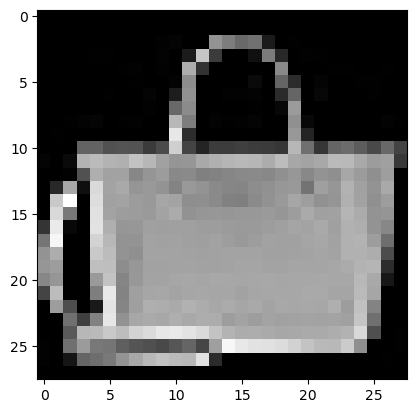

In [17]:
# 이미지 확인해보기
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray')
plt.show()

In [19]:
val_scaled[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [20]:
val_scaled[0:1]

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [21]:
pred = model.predict(val_scaled[0:1])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[3.6274001e-17, 4.2936677e-24, 1.0252819e-22, 1.5971088e-19,
        2.9483560e-18, 2.4374027e-17, 1.3942152e-17, 7.7464479e-21,
        1.0000000e+00, 3.2515985e-21]], dtype=float32)

In [22]:
# 글자로 변경하기
import numpy as np

In [23]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
        '샌달', '셔츠','스니커즈','가방','앵글부츠']

In [24]:
classes[np.argmax(pred)]

'가방'